In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\Urad\Urad_MP.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year'])
# df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df = df.drop(columns=['stl2_7','stl2_8', 'stl2_9', 'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10'])

In [5]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [6]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [7]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [8]:
df.shape

(1300, 57)

In [9]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [10]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [11]:
df.shape

(874, 57)

In [12]:
df['Yield(Tonnes/Hectare)'].skew()

2.788182719892437

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_15040\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

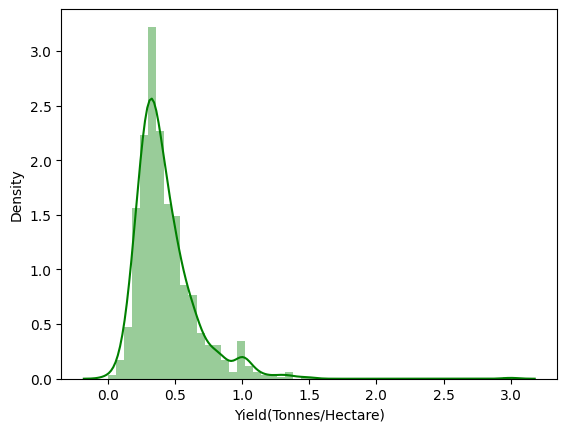

In [13]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [14]:
df['Yield(Tonnes/Hectare)']

6       0.31
7       0.27
8       0.29
9       0.31
10      0.30
        ... 
1292    0.33
1293    1.00
1294    0.57
1295    0.35
1296    0.40
Name: Yield(Tonnes/Hectare), Length: 874, dtype: float64

In [15]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 814


In [16]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [17]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [18]:
df['Yield(Tonnes/Hectare)'].skew()

0.573390994392166

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_15040\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

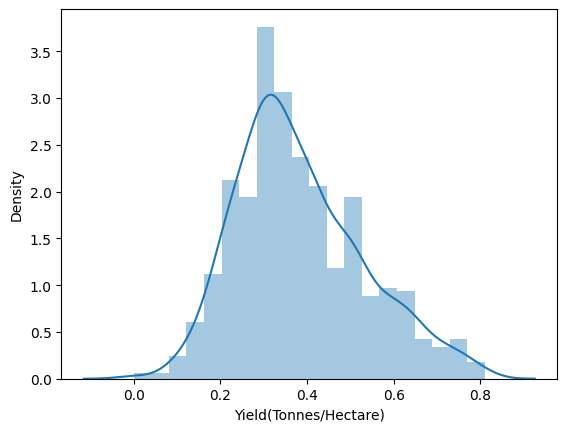

In [19]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [20]:
df.head(10)

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
6,27.439248,26.650892,25.922613,26.152439,31.222816,30.013838,28.920203,28.063454,0.460488,0.453415,...,0.085209,16,16,15,0,82.880616,83.010597,84.857959,58.487390,0.31
7,28.472905,25.832910,28.119333,26.510545,31.172815,30.057950,28.983722,28.663146,0.402076,0.454807,...,0.970547,16,15,9,5,74.646405,82.995489,76.797447,56.672910,0.27
8,27.609879,26.864489,27.301232,26.247982,31.700158,30.430173,29.549990,28.772807,0.454837,0.418353,...,0.582672,13,13,11,3,79.325686,80.838138,80.120752,56.769164,0.29
9,27.107681,25.839027,27.396309,26.927418,31.078409,29.734226,28.726489,28.315774,0.442508,0.456728,...,1.095740,19,18,13,2,80.511784,83.870346,83.448881,64.269046,0.31
10,27.793850,26.918368,27.330405,26.018049,31.259412,30.189282,29.274194,28.580467,0.454635,0.449704,...,0.000000,19,9,12,0,81.331777,83.195917,83.367686,51.739194,0.30
11,27.465118,26.359210,26.701729,26.220090,30.439640,29.455971,28.655662,28.075955,0.415164,0.447536,...,0.777928,13,14,19,3,76.503378,82.879845,82.891248,60.152286,0.29
12,27.532296,27.382923,28.202081,25.829695,32.154073,30.838440,29.780676,29.220702,0.455169,0.416725,...,4.083267,23,12,5,4,80.870310,78.602924,74.490101,56.779942,0.30
13,28.024903,26.793426,27.440869,28.057046,31.789421,30.504414,29.430524,29.015493,0.452503,0.465049,...,0.395917,20,17,9,2,81.176712,85.130937,78.919937,62.568465,0.24
14,27.329498,26.251414,26.446769,27.950627,30.979832,29.767744,28.706161,28.217232,0.442614,0.465815,...,0.014859,20,27,12,0,80.851017,86.566274,82.090196,52.303633,0.26
15,27.741287,25.929324,26.758931,26.693698,31.431430,30.130156,28.937584,28.364513,0.433674,0.463874,...,0.357877,20,17,13,1,79.678090,84.527202,81.563359,58.142223,0.42


In [21]:
df.shape

(814, 57)

In [22]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [23]:
df.head()

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
6,27.439248,26.650892,25.922613,26.152439,31.222816,30.013838,28.920203,28.063454,0.460488,0.453415,...,0.085209,16,16,15,0,82.880616,83.010597,84.857959,58.487390,0.31
7,28.472905,25.832910,28.119333,26.510545,31.172815,30.057950,28.983722,28.663146,0.402076,0.454807,...,0.970547,16,15,9,5,74.646405,82.995489,76.797447,56.672910,0.27
8,27.609879,26.864489,27.301232,26.247982,31.700158,30.430173,29.549990,28.772807,0.454837,0.418353,...,0.582672,13,13,11,3,79.325686,80.838138,80.120752,56.769164,0.29
9,27.107681,25.839027,27.396309,26.927418,31.078409,29.734226,28.726489,28.315774,0.442508,0.456728,...,1.095740,19,18,13,2,80.511784,83.870346,83.448881,64.269046,0.31
10,27.793850,26.918368,27.330405,26.018049,31.259412,30.189282,29.274194,28.580467,0.454635,0.449704,...,0.000000,19,9,12,0,81.331777,83.195917,83.367686,51.739194,0.30


In [24]:
df.shape

(814, 57)

In [25]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [26]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [27]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [28]:
df.shape

(814, 57)

In [29]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.28, R^2 Score (Test): 0.13
[0.22879210477762202, 0.08510096221513752, 0.01723007522417286, 0.11155734516230731, 0.21478542292401526, -0.114161891603908, 0.23616176887936824, 0.07698295694548196, 0.1465107129865575, 0.25088361672257575]
Ridge Regression - R^2 Score (Train) : 0.24, R^2 Score (Test): 0.14
[0.1905753897878446, 0.16706942238415512, 0.0872413162388207, 0.20853347400833044, 0.1502956999483126, 0.14343004893393696, 0.11510362283935727, 0.24746005030379625, 0.031044155929001116, 0.08370424644621666]
XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.17
[0.23933406789574385, 0.2600088126317682, -0.04737325188175201, 0.1666774571143016, 0.14312599111222646, 0.07577747240992183, 0.17682955776957376, 0.2091005994214119, 0.2507898187240022, 0.18241882164086642]
Lasso Regression - R^2 Score (Train) : 0.03, R^2 Score (Test): 0.00
[0.07253051191971838, 0.06242242838212708, 0.02147802477173999, -0.002689273233589917, -0.04638884112631

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [34]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [35]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

44


In [36]:
print(columns_to_drop)

['stl4_8', 'stl4_7', 'stl4_9', 'stl4_10', 'stl4_8', 'stl4_10', 'stl4_8', 'stl4_9', 'swvl2_7', 'swvl2_8', 'swvl4_10', 'swvl2_9', 'swvl2_10', 'swvl1_7', 'swvl3_7', 'swvl1_8', 'swvl3_8', 'swvl4_9', 'swvl4_10', 'swvl1_9', 'swvl3_9', 'swvl1_10', 'swvl3_10', 'swvl2_7', 'swvl2_8', 'swvl4_9', 'swvl4_10', 'swvl2_9', 'swvl2_10', 'swvl4_8', 'swvl4_7', 'swvl4_9', 'swvl4_10', 'swvl2_8', 'swvl3_8', 'swvl4_8', 'swvl4_10', 'swvl1_8', 'swvl2_8', 'swvl3_8', 'swvl4_8', 'swvl4_9', 'tmin_8', 'tmin_7']


In [37]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl4_7 : [('stl4_8', 0.956)]
stl4_8 : [('stl4_7', 0.956), ('stl4_9', 0.9691), ('stl4_10', 0.9202)]
stl4_9 : [('stl4_8', 0.9691), ('stl4_10', 0.9751)]
stl4_10 : [('stl4_8', 0.9202), ('stl4_9', 0.9751)]
swvl1_7 : [('swvl2_7', 0.9854)]
swvl1_8 : [('swvl2_8', 0.9934), ('swvl4_10', 0.9035)]
swvl1_9 : [('swvl2_9', 0.9833)]
swvl1_10 : [('swvl2_10', 0.9661)]
swvl2_7 : [('swvl1_7', 0.9854), ('swvl3_7', 0.9197)]
swvl2_8 : [('swvl1_8', 0.9934), ('swvl3_8', 0.9188), ('swvl4_9', 0.9114), ('swvl4_10', 0.9173)]
swvl2_9 : [('swvl1_9', 0.9833), ('swvl3_9', 0.9235)]
swvl2_10 : [('swvl1_10', 0.9661), ('swvl3_10', 0.906)]
swvl3_7 : [('swvl2_7', 0.9197)]
swvl3_8 : [('swvl2_8', 0.9188), ('swvl4_9', 0.9337), ('swvl4_10', 0.9421)]
swvl3_9 : [('swvl2_9', 0.9235)]
swvl3_10 : [('swvl2_10', 0.906)]
swvl4_7 : [('swvl4_8', 0.9312)]
swvl4_8 : [('swvl4_7', 0.9312), ('swvl4_9', 0.9462), ('swvl4_10', 0.915)]
swvl4_9 : [('swvl2_8', 0.9114), ('swvl3_8', 0.9337), ('swvl4_8', 0.9462), ('swvl4_10

In [38]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")